In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

dataset = pd.read_csv('zoo_data.csv')

In [2]:
dataset

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]

fn = ['hair','feathers','eggs','milk', 'airbone','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']
cn = ['Mammals', 'Fish', 'Birds', 'Molluscs', 'Insects', 'Amphibians', 'Reptiles']

labels = dataset.iloc[:,-1].unique()

labels

array([1, 4, 2, 7, 6, 5, 3])

The prediction accuracy (using entropy) is:  80.95238095238095 %

Confusion Matrix:
 [[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 2 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 2 1]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         3
           5       0.33      1.00      0.50         1
           6       0.50      1.00      0.67         2
           7       1.00      0.33      0.50         3

    accuracy                           0.81        21
   macro avg       0.83      0.81      0.74        21
weighted avg       0.92      0.81      0.80        21



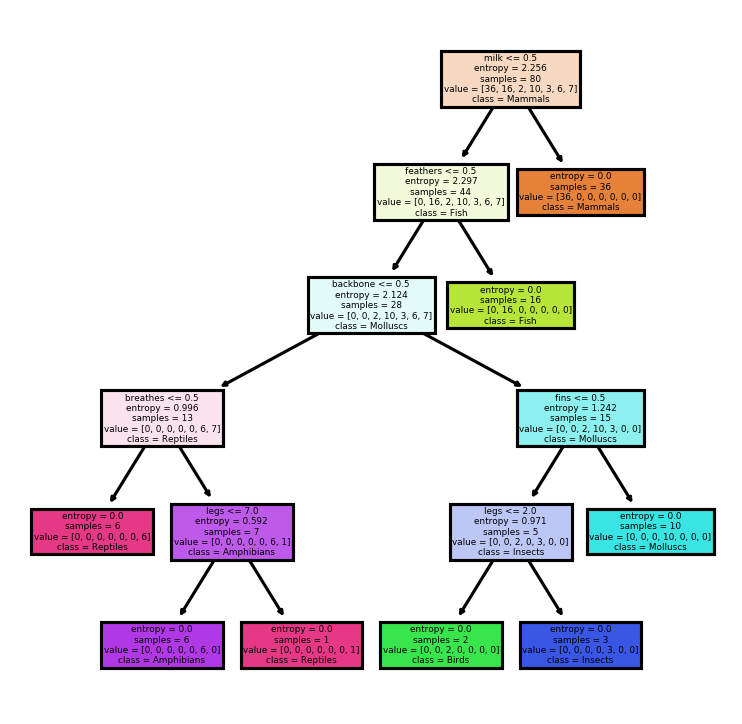

In [4]:
clf = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)
prediction = clf.predict(test_features)
print("The prediction accuracy (using entropy) is: ",clf.score(test_features,test_targets)*100,"%")

print("\nConfusion Matrix:\n", confusion_matrix(test_targets,prediction))
print("\nClassification Report:\n" , classification_report(test_targets, prediction))

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=225)

tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True);

The prediction accuracy (using gini) is:  76.19047619047619 %

Confusion Matrix:
 [[5 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 1 1 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 2 1]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      0.33      0.50         3
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         1
           6       0.33      1.00      0.50         2
           7       1.00      0.33      0.50         3

    accuracy                           0.76        21
   macro avg       0.76      0.67      0.64        21
weighted avg       0.89      0.76      0.76        21



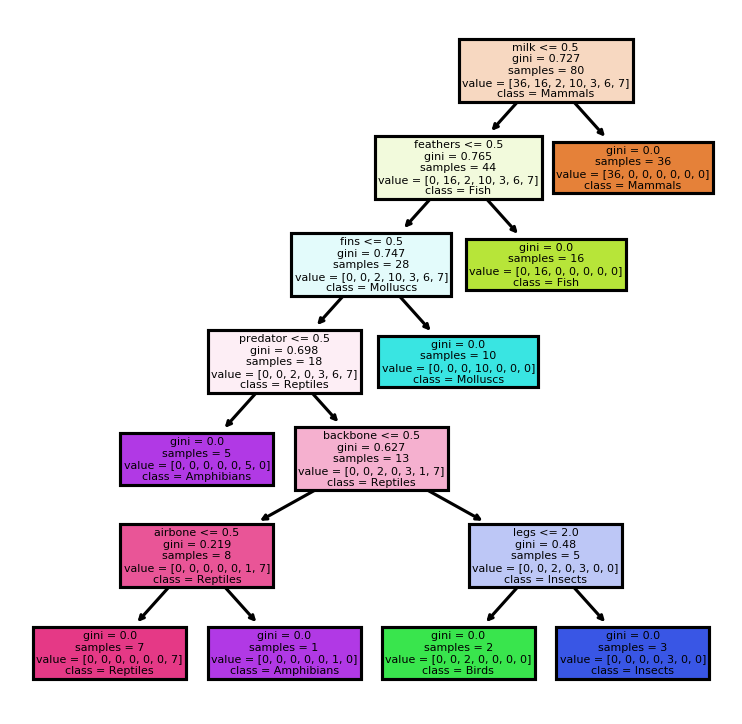

In [5]:
clf = DecisionTreeClassifier(criterion = 'gini').fit(train_features,train_targets)
prediction = clf.predict(test_features)
print("The prediction accuracy (using gini) is: ",clf.score(test_features,test_targets)*100,"%")

print("\nConfusion Matrix:\n", confusion_matrix(test_targets,prediction))
print("\nClassification Report:\n" , classification_report(test_targets, prediction))

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=225)

tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True);